## <center>CSCI E-82</center>
## <center>HW 1  Dimensionality Reduction</center>
### <center>Due: Sept 17, 2018 11:59pm EST</center>

#### Note that this is an individual homework to be completed without collaborations except through Piazza.  

#### We encourage you to make progress this weekend since the second homework will likely come out in a week before this one is due.



### Your name: Sydney Correa

In [2]:
import numpy as np
import sklearn as sk

### Problem 1   (5 points)

$$\mathbf{X} = \left[\begin{array}
{rrr}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{array}\right]
$$

$$\mathbf{Y} = \left[\begin{array}
{rrr}
1 & 2 & 1 \\
2 & 1 & 2  
\end{array}\right]
$$

Compute XY<sup>T</sup>.  The answer can be computed by hand and written in Markdown like the above matrices, or computed in python.  Either way is acceptable.

In [3]:
X = np.array([[1,2,3],[4,5,6],[7,8,9]])
Y = np.array([[1,2,1],[2,1,2]])
Z = np.dot(X,Y.T)
print (Z)

[[ 8 10]
 [20 25]
 [32 40]]


### Problem 2  

This problem goes through a combination of python data manipulations as well as the full math projection using PCA.  We have divided the problem into multiple parts.



### Problem 2a  (5 points)

Download and load in the data set from the UCI archive https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/.  Print the dimensions and the first few rows to demonstrate a successful load.

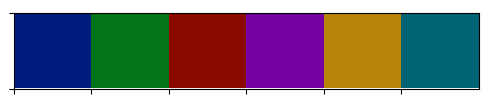

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# Remember to use inline to get your plots in the notebook
%matplotlib inline

# special matplotlib command for global plot configuration
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.style

from matplotlib.colors import ListedColormap

dark2_colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']
dark2_cmap = ListedColormap(dark2_colors)

def set_mpl_params():
    rcParams['figure.figsize'] = (10, 6)
    rcParams['figure.dpi'] = 100
    rcParams['axes.prop_cycle'].by_key()['color'][1]
    rcParams['lines.linewidth'] = 2
    rcParams['axes.facecolor'] = 'white'
    rcParams['font.size'] = 12
    rcParams['patch.edgecolor'] = 'white'
    rcParams['patch.facecolor'] = dark2_colors[0]
    rcParams['font.family'] = 'StixGeneral'

set_mpl_params()
mpl.style.use('seaborn-dark-palette') 

import seaborn as sns #If you don't have seaborn, use - conda install seaborn
current_palette = sns.color_palette()
sns.palplot(current_palette)

EColi Data: 
%s     mcg   gvh   lip  chg   aac  alm1  alm2
0  0.49  0.29  0.48  0.5  0.56  0.24  0.35
1  0.07  0.40  0.48  0.5  0.54  0.35  0.44
2  0.56  0.40  0.48  0.5  0.49  0.37  0.46
3  0.59  0.49  0.48  0.5  0.52  0.45  0.36
4  0.23  0.32  0.48  0.5  0.55  0.25  0.35
EColi Class Data: 
%s 0    cp
1    cp
2    cp
3    cp
4    cp
Name: type, dtype: object


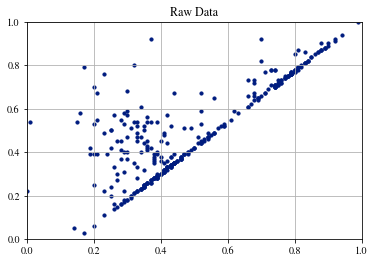

In [5]:
#import dataset
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data'
url = 'C:\\Users\\corre\\Desktop\\CSCI E-82\\DAT files\\ecoli.data'
#name columns
eColiCols = ['N_ecoli','mcg','gvh','lip','chg','aac','alm1','alm2','type']
#read table into dataset
eColiData = pd.read_table(url, sep='\s+', header= None, names = eColiCols)
#print few rows
#print (eColiData.head())
eColiData.describe()

#print dimensions of array
#eColiData.shape

#split data into data and values for Ecoli Dataset
eColiData_num = eColiData.iloc[:,1:8]
eColiData_class = eColiData.iloc[:,8]

#print data
print ('EColi Data: \n%s', eColiData_num.head())
#print class
print ('EColi Class Data: \n%s', eColiData_class.head())

#print dataset for two dimensions alm2, alm1
ax = plt.gca()
ax.axis([0, 1, 0, 1])
#ax.scatter(eColiData.iloc[:,6], eColiData.iloc[:,5], s=10)
ax.scatter(eColiData.alm2, eColiData.alm1, s=10)
ax.set_title('Raw Data')
ax.grid(True)
#cible_border()
plt.show()

### Problem 2b  (10 points)
Compute and print the covariance matrix for all columns excluding the first and last.  Rather than use the built-in function, compute this using python code for practice.  The following equation will suffice for this.

Cov(X, Y) = Σ ( Xi - X ) ( Yi - Y ) / N 

In [6]:
from sklearn.preprocessing import StandardScaler

#standardize the data
X_std = StandardScaler().fit_transform(eColiData_num)

eColiData_num = eColiData.iloc[:,1:8].values

#find means for dimensions
eColiData_mean = np.mean(eColiData_num, axis=0)

cov_mat = (X_std - eColiData_mean).T.dot((X_std - eColiData_mean)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

#validate cov matrix
print('Covariance matrix validate\n%s' %np.cov(X_std.T))


Covariance matrix 
[[1.25379105 0.70693901 0.39578701 0.32199783 0.47214889 0.64902932
  0.41822671]
 [0.70693901 1.25373134 0.29241285 0.27001367 0.3207939  0.42484554
  0.13005389]
 [0.39578701 0.29241285 1.24921456 0.56209934 0.31889194 0.34463989
  0.19060217]
 [0.32199783 0.27001367 0.56209934 1.2552261  0.20664813 0.24390583
  0.19901358]
 [0.47214889 0.3207939  0.31889194 0.20664813 1.25376119 0.53116752
  0.50405568]
 [0.64902932 0.42484554 0.34463989 0.24390583 0.53116752 1.25391048
  1.06244095]
 [0.41822671 0.13005389 0.19060217 0.19901358 0.50405568 1.06244095
  1.25346276]]
Covariance matrix validate
[[ 1.00298507  0.45616289  0.14727982  0.07047535  0.22135784  0.39816364
   0.16758494]
 [ 0.45616289  1.00298507  0.04393523  0.01852114  0.07003271  0.17400972
  -0.12055805]
 [ 0.14727982  0.04393523  1.00298507  0.31288221  0.07039954  0.09607353
  -0.05774233]
 [ 0.07047535  0.01852114  0.31288221  1.00298507 -0.04485938 -0.00767652
  -0.05234423]
 [ 0.22135784  0.070032

### Problem 2c  (10 points)

Compute the decomposition of the covariance matrix using singular value decomposition.  Using a python function is definitely the way to go here.

In [7]:
#get cov matrix
eColiData_cov = np.cov(X_std.T)
#print Cov dataset
#print ('Cov dataset')
#print(eColiData_cov)

#check value of determinant >=0
print ('value of Det(Cov)')
print(np.linalg.det(eColiData_cov)) 

#get eigenvalues, eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(eColiData_cov)
print('Unsorted eign values: \n%s', eigenvalues)
print('Unsorted eign values: \n%s', eigenvectors)

value of Det(Cov)
0.13729373206325216
Unsorted eign values: 
%s [0.12680082 0.48008494 0.671441   0.85971779 1.20508931 1.46555238
 2.21220928]
Unsorted eign values: 
%s [[-0.08154845  0.75965086 -0.00490985 -0.06707282 -0.29219921  0.37265574
  -0.43301833]
 [-0.18599716 -0.60363588  0.05019625 -0.14655068 -0.55288668  0.47029644
  -0.22398568]
 [-0.10478843 -0.10724976 -0.67128037  0.20125402  0.49223261  0.48177748
  -0.10951653]
 [ 0.01462969 -0.03639389  0.67163159 -0.20553058  0.5451792   0.45560856
  -0.01816912]
 [ 0.01385432 -0.09557701  0.29459176  0.88426143 -0.00818155 -0.04745278
  -0.34590722]
 [ 0.70393508 -0.16949665 -0.09365082 -0.24341844  0.11045841 -0.16428058
  -0.6070701 ]
 [-0.67219322 -0.08867463  0.01396843 -0.22384663  0.23907035 -0.4135461
  -0.51167924]]


In [170]:
#sort eigenvalues to get higher values
idx = np.argsort(-eigenvalues)
#apply index to sort eigenvalues
eigenvalues = eigenvalues[idx]
print('Sorted eigen values: ', eigenvalues)

#sort eigenvectors
eigenvectors = eigenvectors[idx]
#print ('Eigen vector shape: ', eigenvectors.shape)
#print ('Sorted Eigenvectors: ', eigenvectors)

#calculate Singular value decomp
S = eigenvalues*np.eye(7)
U = eigenvectors
V = U
D = np.dot(U, np.dot(S,V.T))
#print ('D value: ')
#print(D)

#validate SVD results using np svd function
U1, S1, V1 = np.linalg.svd(X_std.T)
print('Validate U1 value: ')
print(U1)

Sorted eigen values:  [2.21220928 1.46555238 1.20508931 0.85971779 0.671441   0.48008494
 0.12680082]
Validate U1 value: 
[[-0.43301833  0.37265574 -0.29219921  0.06707282  0.00490985  0.75965086
   0.08154845]
 [-0.22398568  0.47029644 -0.55288668  0.14655068 -0.05019625 -0.60363588
   0.18599716]
 [-0.10951653  0.48177748  0.49223261 -0.20125402  0.67128037 -0.10724976
   0.10478843]
 [-0.01816912  0.45560856  0.5451792   0.20553058 -0.67163159 -0.03639389
  -0.01462969]
 [-0.34590722 -0.04745278 -0.00818155 -0.88426143 -0.29459176 -0.09557701
  -0.01385432]
 [-0.6070701  -0.16428058  0.11045841  0.24341844  0.09365082 -0.16949665
  -0.70393508]
 [-0.51167924 -0.4135461   0.23907035  0.22384663 -0.01396843 -0.08867463
   0.67219322]]


### Problem 2d  (10 points)

    Compute the projection of the raw data onto the appropriate two eigenvectors.  Consider which columns should be projected and the normalizations.
    
Answer: Considering the last two feature vectors alm2, alm1 to be projected    

In [8]:
#finding orientation for axes
h1 = (eigenvectors[6][0]/eigenvectors[5][0])*eColiData_0.alm2
h2 = (eigenvectors[6][1]/eigenvectors[5][1])*eColiData_0.alm2

NameError: name 'eColiData_0' is not defined

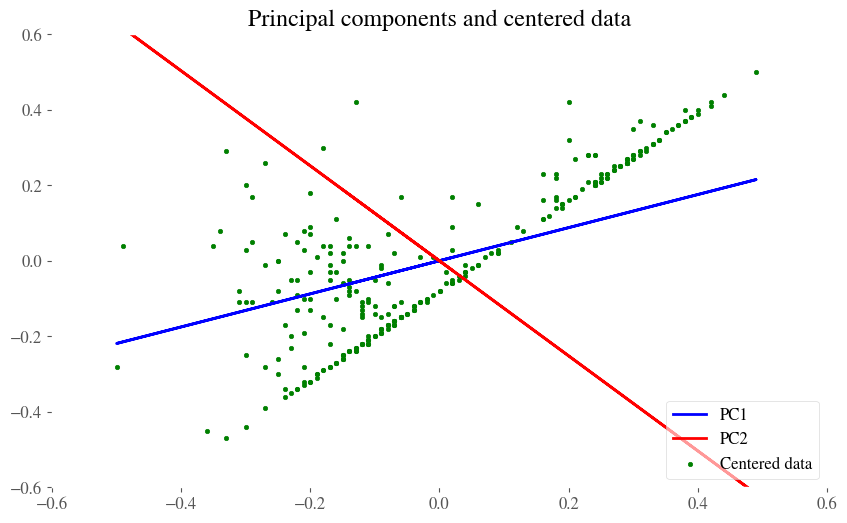

In [172]:
#ploting the PCA
ax = plt.gca()
ax.plot(eColiData_0.alm2, h1, color='blue', label='PC1')
ax.plot(eColiData_0.alm2, h2, color='red', label='PC2')
ax.axis([-0.6, 0.6, -0.6, 0.6])
ax.scatter(eColiData_0.alm2, eColiData_0.alm1, s=10, c='green', label='Centered data')
ax.set_title('Principal components and centered data')
ax.grid(True)
#cible_border()
legend = ax.legend(loc=4,frameon=True,framealpha=0.6, scatterpoints=1)
rect = legend.get_frame()
#rect.set_facecolor(light_grey)
rect.set_linewidth(0.6)
plt.show()  

### Problem 2e  (10 points)

Plot the projected points such that the 8 different classes can be visually identified.  Be sure to label the classes and axes.  Commont on the quality of the separation of the different classes using PCA.

In [173]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
pca_fit = sklearn_pca.fit_transform(X_std)

In [ ]:

x1 = pca_fit[:,0]
y1 = pca_fit[:,1]
n = eColiData.iloc[:,8:9]

ax = plt.gca()
ax.axis([-3, 3, -3, 3])
ax.scatter(x1, y1, s=10, c='green', label='Centered data')

for i, txt in enumerate(n.values):
    ax.annotate(txt[0], (x1[i],y1[i]), zorder=1, size=14, color=shade_black)

ax.set_title('Principal components and centered data')
ax.grid(True)
#cible_border()
legend = ax.legend(loc=4,frameon=True,framealpha=0.6, scatterpoints=1)
rect = legend.get_frame()
#rect.set_facecolor(light_grey)
rect.set_linewidth(0.6)
plt.show()  

### Problem 2f (10 points)

The PCA that you have just completed takes each data point and projects it using a weighted sum of features.  One could also do the opposite to map the features as a weighted sum of the data entries.  How could this be done?  What is a potential issue? Describe these in a few sentences (do not code it).

Answer: To map features as weighted sum of data entries we would need to transpose each of the EColi variation into a feature. For this we would need to transpose each row of the data to a feature vector and then apply the same steps of PCA. However by doing it this way we end up with very high number of features and data would be more localized. This may not help with analysis of the overall protien localization for entire dataset.

### Problem 3  MDS  (10 points)

For the same data set, repeat 2e using sklearn's Multidimensional scaling algorithm.  

In [174]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.manifold import MDS

#get eculidean dist
Euclid_dist = euclidean_distances(eColiData_num)

#Default metric = True, for NonMetric set metric=False
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=99)  

mds_fit = mds.fit_transform(Euclid_dist)  # shape (n_samples, n_components)


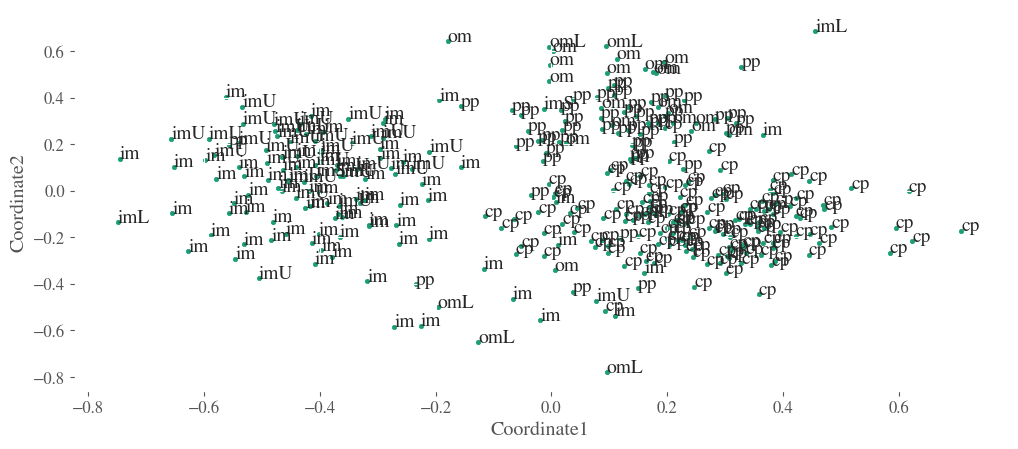

In [175]:
#plot the MDS fit

x1 = mds_fit[:,0]
y1 = mds_fit[:,1]
n = eColiData.iloc[:,8:9]

fig, ax = plt.subplots(figsize=(12,5))

dark2_colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']
shade_black = '#262626'
ax.scatter(x1, y1, s=10, zorder=0, c=dark2_colors[0])

for i, txt in enumerate(n.values):
    ax.annotate(txt[0], (x1[i],y1[i]), zorder=1, size=14, color=shade_black)
    
ax.set_xlabel('Coordinate1')
ax.set_ylabel('Coordinate2');

### Problem 4a  t-SNE  (5 points)

Repeat 2e using a t-SNE plot with the default settings.

Answer: Running t-SNE with components=2 and preplexity=20

In [176]:
from sklearn.manifold import TSNE

#run TSNE with 2 components and preplexity 20
X_embedded = TSNE(n_components=2, perplexity=20, verbose=0).fit_transform(eColiData_0)


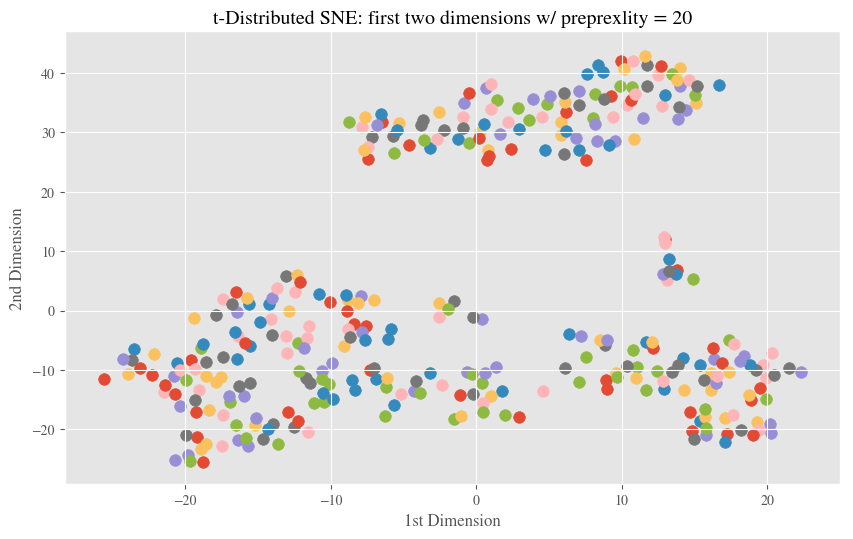

In [177]:
mpl.style.use('ggplot')

plt.figure(figsize=(10,6))
for i in range(X_embedded.shape[0]):
    plt.scatter(X_embedded[i,0], X_embedded[i,1], s = 70, zorder=0)  
plt.ylabel('2nd Dimension')
plt.xlabel('1st Dimension')
plt.title('t-Distributed SNE: first two dimensions w/ preprexlity = 20')
plt.show()

### Problem 4b t-SNE perplexity  (5 points)

Try out a few t-SNE plots by varying the perplexity.  State the best perplexity for separating the 8 different classes and describe your rationale in a sentence or two.  Report the average calculation time for the t-SNE projection over a number of iterations.

Answer: Looking at the below points, preplexity <20 can be used for more localized visualizations and analysis. Having preplexity >20 helps with more distinct clusters and helps with more higher level (global) analysis for the 8 different classes.

Also looking at times taken, it is a less than 10 seconds for preplexity = 0 and 10 and then staying constant after prelexity >=20 

Time taken:  2.5 in seconds, varing preplexity = 0  and  10  iterations


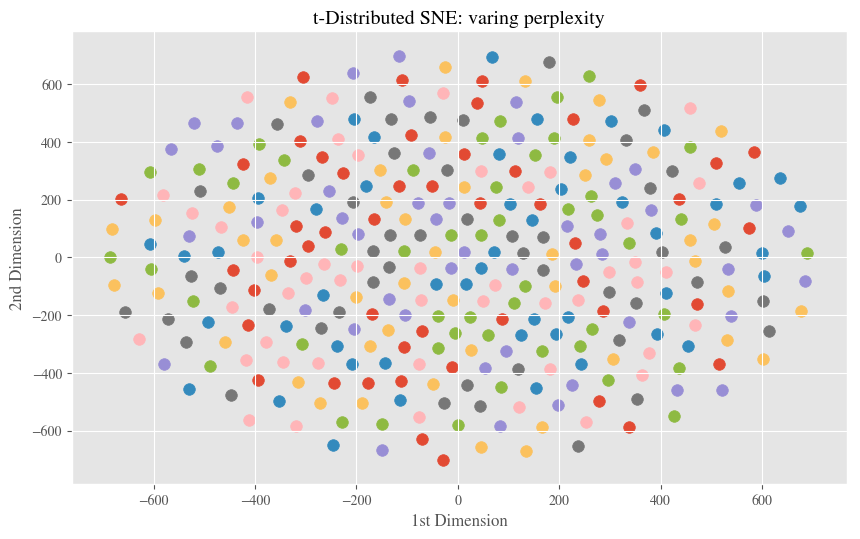

Time taken:  5.0 in seconds, varing preplexity = 10  and  10  iterations


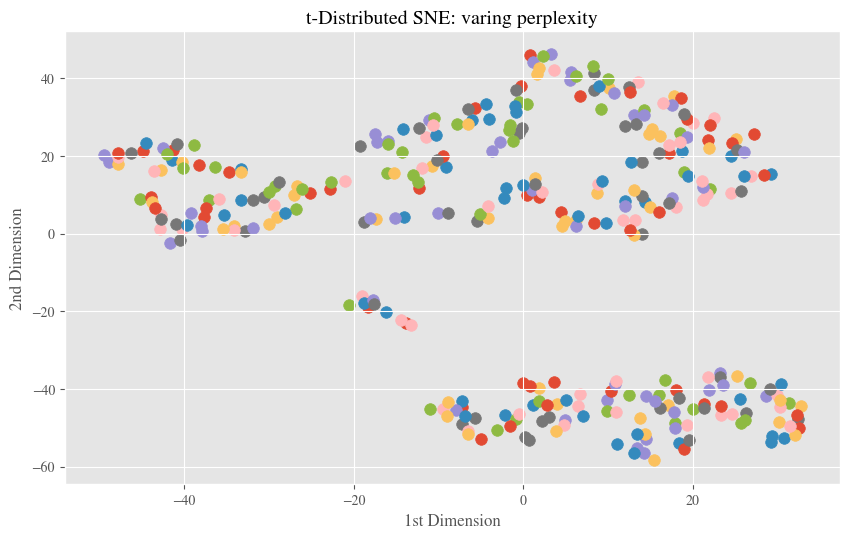

Time taken:  6.65 in seconds, varing preplexity = 20  and  10  iterations


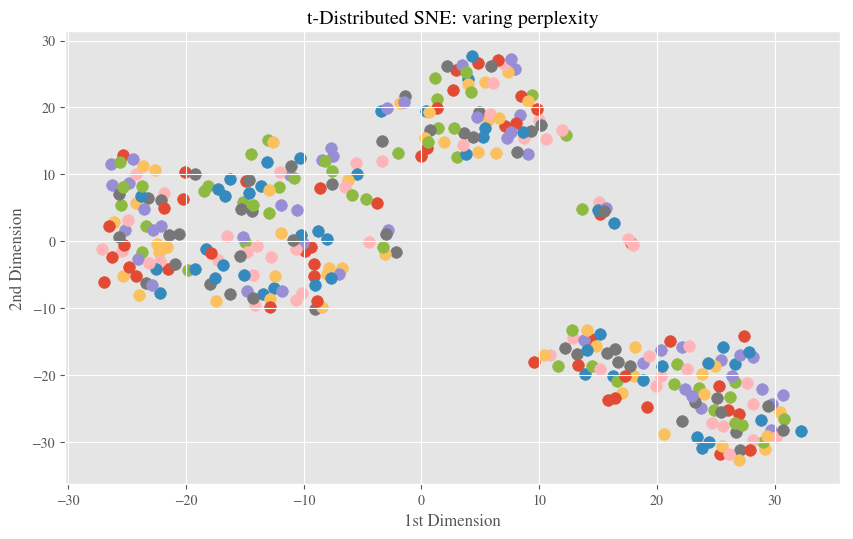

Time taken:  8.6 in seconds, varing preplexity = 30  and  10  iterations


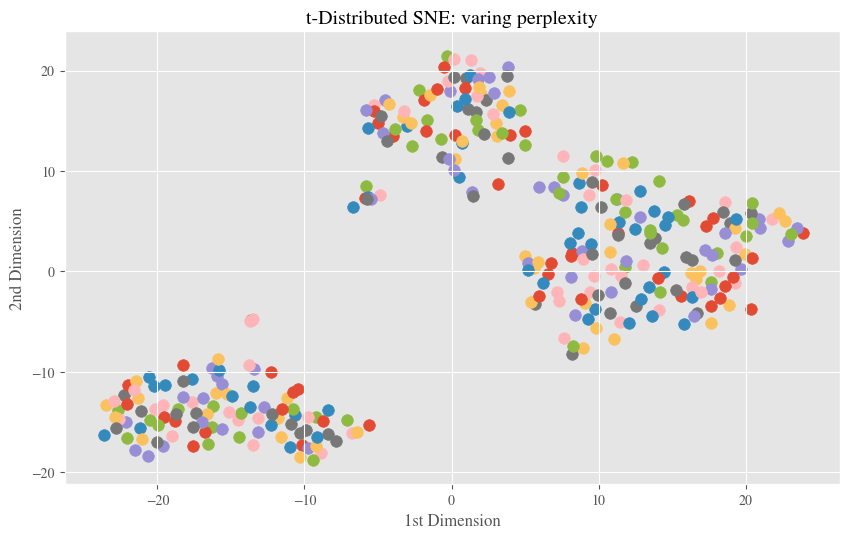

Time taken:  11.04 in seconds, varing preplexity = 40  and  10  iterations


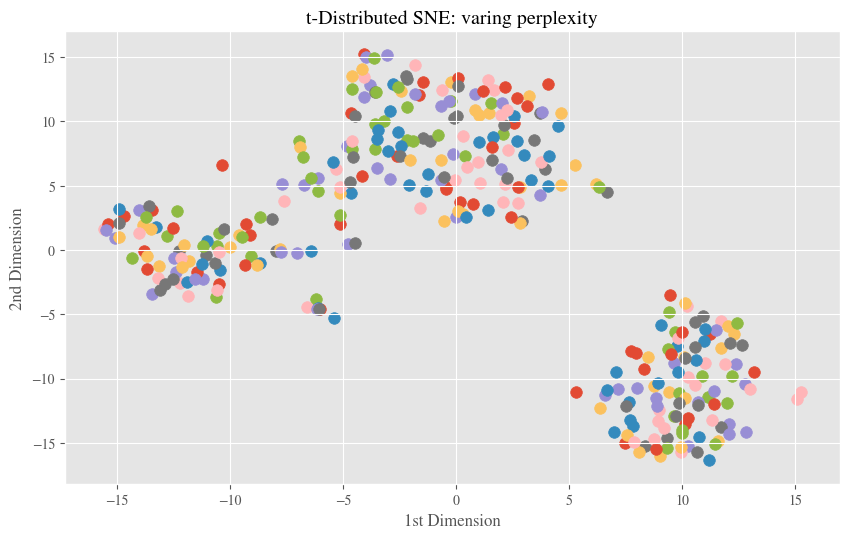

Time taken:  11.14 in seconds, varing preplexity = 50  and  10  iterations


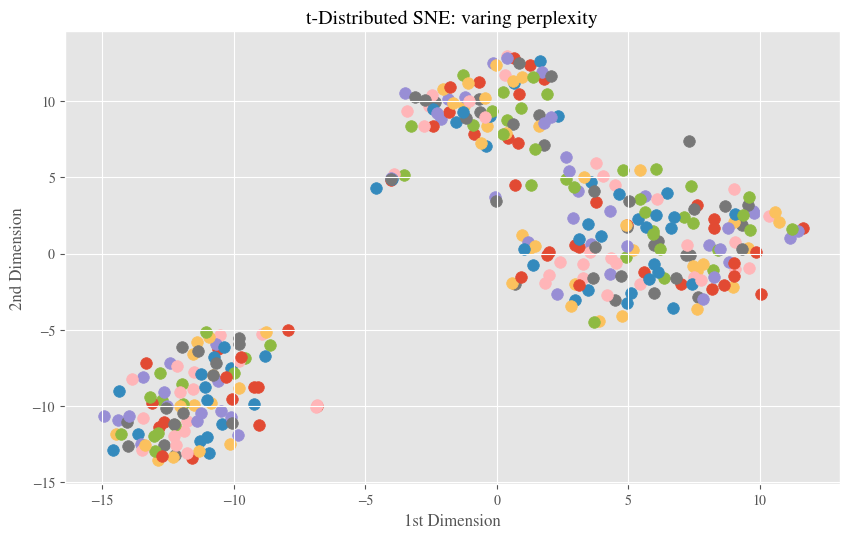

In [179]:
import timeit

for iCounter in range(0,60,10):
    start = timeit.default_timer()
    for nloop in range(11): 
        X_embedded = TSNE(n_components=2, perplexity=iCounter, verbose=0).fit_transform(eColiData_0)
    stop = timeit.default_timer()
    print('Time taken: ', round((stop - start)/nloop,2), 'in seconds, varing preplexity =', iCounter, ' and ', nloop, ' iterations') 
    
    #plotting the t-SNE    
    mpl.style.use('ggplot')
    plt.figure(figsize=(10,6))
    for i in range(X_embedded.shape[0]):
        plt.scatter(X_embedded[i,0], X_embedded[i,1], s = 70, zorder=0)  
    plt.ylabel('2nd Dimension')
    plt.xlabel('1st Dimension')
    plt.title('t-Distributed SNE: varing perplexity')
    plt.show()
    
    

### Problem 4c  t-SNE randomization (10 points)

The S of t-SNE means stochastic or random, usually as a function of time.  Explore whether you can reproduce the result in 4b through a second projection and plot.

## Problem 4d t-SNE Barnes-Hut  (5 points)

The default t-SNE method of 4b uses the Barnes-Hut approximation.  Keeping the other parameters the same as 4b, plot the t-SNE result using the exact method.  Which method do you prefer?  Compare the average calculation time for the exact method over a number of iterations.

Answer: Looking at the iteration times for 10 iterations, we see using method exact increased run time by 3 times. This can be a potential problem for very large datasets.


Time:  68.4031629940655 seconds


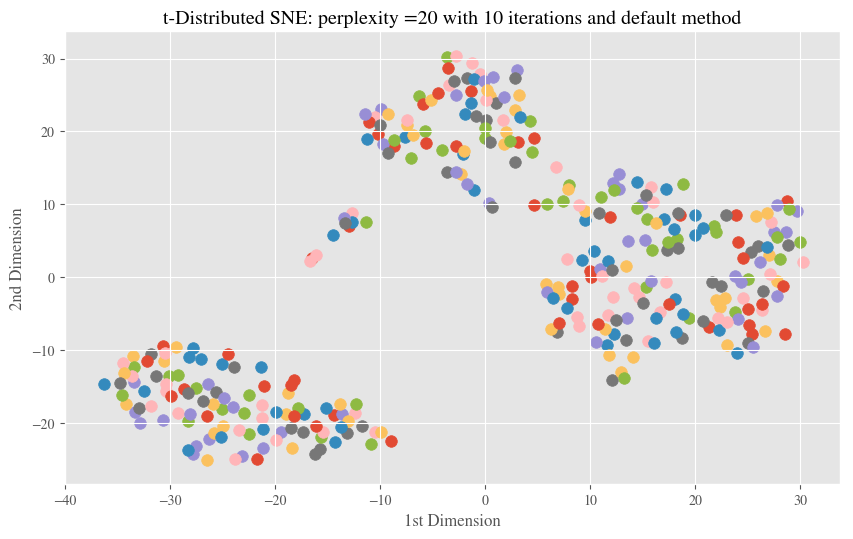

In [181]:
import timeit

start = timeit.default_timer()

for nloop in range(11):
    X_embedded_20 = TSNE(n_components=2, perplexity=20, verbose=0).fit_transform(eColiData_0)

stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds') 

mpl.style.use('ggplot')

plt.figure(figsize=(10,6))
for i in range(X_embedded_20.shape[0]):
    plt.scatter(X_embedded_20[i,0], X_embedded_20[i,1], s = 70, zorder=0)  
plt.ylabel('2nd Dimension')
plt.xlabel('1st Dimension')
plt.title('t-Distributed SNE: perplexity =20 with 10 iterations and default method')
plt.show()

Total Time:  87.99440425306966 seconds


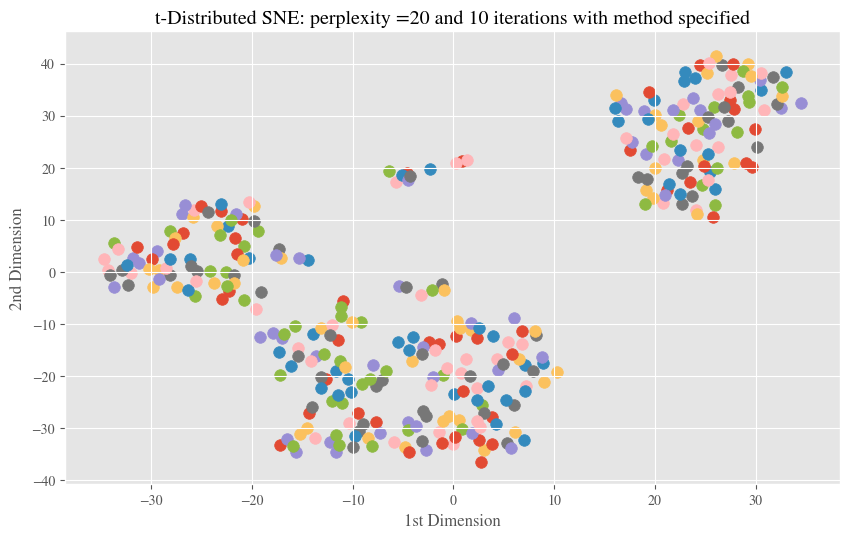

In [182]:
start = timeit.default_timer()

for nloop in range(11):
    X_embedded_20_s = TSNE(n_components=2, perplexity=20, verbose=0, method='exact').fit_transform(eColiData_0)

stop = timeit.default_timer()
print('Total Time: ', stop - start, 'seconds') 

#plot tSNE
mpl.style.use('ggplot')

plt.figure(figsize=(10,6))
for i in range(X_embedded_20_s.shape[0]):
    plt.scatter(X_embedded_20_s[i,0], X_embedded_20_s[i,1], s = 70, zorder=0)  
plt.ylabel('2nd Dimension')
plt.xlabel('1st Dimension')
plt.title('t-Distributed SNE: perplexity =20 and 10 iterations with method specified')
plt.show()

### How many hours did this homework take?  

This will not affect your grade.  We will be monitoring time spent on homework to be sure that we are not over-burdening students.

In [ ]:
6 Hrs

### Last step (5 points)

Save this notebook as LastnameFirstnameHW1.ipynb such as MuskElonHW1.ipynb.   Create a pdf of this notebook named similarly.  Submit both the python notebook and the pdf version to the Canvas dropbox.  We require both versions.